In [1]:
import numpy as np
import pandas as pd

### Data

In [10]:
sentence = "love apple phones"

### Tokenization

In [17]:
def tokenizer(text: str):
    tokens = text.split()
    tokens_id = range(len(tokens))
    return tokens, tokens_id
    
vocab, tokens_id = tokenizer(text=sentence)
tokens_map = dict(zip(tokens_id, vocab))

tokens_map

{0: 'love', 1: 'apple', 2: 'phones'}

### Parameters

In [38]:
d_model = 8 # length of the embedding

### Embeddings matrix

In [39]:
id_embedding_map = {token: np.random.rand(d_model) for token in tokens_id}

embeddings_matrix = np.stack(list(id_embedding_map.values()))

display(embeddings_matrix)

print(embeddings_matrix.shape) # len vocal * d_model

array([[0.2211634 , 0.69439492, 0.36936225, 0.86255396, 0.21836561,
        0.68133071, 0.14679918, 0.2067474 ],
       [0.63008471, 0.11643044, 0.89792268, 0.11410437, 0.81622155,
        0.71976018, 0.13000252, 0.53951498],
       [0.63619635, 0.81164294, 0.04454184, 0.08408191, 0.42980426,
        0.75182829, 0.54931108, 0.54083379]])

(3, 8)


### Positional encoding

In [6]:
token_map['love']

array([0.41877164, 0.7406083 , 0.63273887, 0.68288812, 0.24344543,
       0.41136283, 0.78814334, 0.22040503])

In [7]:
emb_matrix = np.stack([token_map['love'], token_map['apple'], token_map['phones']])

In [8]:
emb_matrix.shape, emb_matrix

((3, 8),
 array([[0.41877164, 0.7406083 , 0.63273887, 0.68288812, 0.24344543,
         0.41136283, 0.78814334, 0.22040503],
        [0.70662576, 0.72096715, 0.96152015, 0.29253428, 0.10501819,
         0.73607981, 0.18918026, 0.57251864],
        [0.95471975, 0.54944374, 0.80016661, 0.17687654, 0.76162503,
         0.40311445, 0.29652235, 0.16036981]]))

In [100]:
d_k = 4
W_size = (emb_size, d_k)


# key[query] = value
W_k = np.random.rand(W_size[0], W_size[1])
W_q = np.random.rand(W_size[0], W_size[1])
W_v = np.random.rand(W_size[0], W_size[1])

In [101]:
emb_matrix.shape, W_k.shape

((3, 8), (8, 4))

In [102]:
K = emb_matrix @ W_k
Q = emb_matrix @ W_q
V = emb_matrix @ W_v


In [103]:
K

array([[1.45893212, 1.19566837, 2.17222035, 1.56792241],
       [1.2115007 , 0.87211912, 1.30452795, 1.98723794],
       [2.12727217, 2.38541076, 3.93914035, 2.55554526]])

In [104]:
# similarty = Q * K.T
Q.shape, K.shape, K.T.shape

sim_matrix = (Q @ K.T) / np.sqrt(d_k)
sim_matrix

array([[ 5.13470108,  4.30316311,  8.99236314],
       [ 4.51981817,  3.98235005,  7.73965995],
       [ 9.19920378,  7.74679662, 15.98709869]])

In [105]:
df = pd.DataFrame(sim_matrix, index=[f"K_{token}" for token in vocab], columns=[f"Q_{token}" for token in vocab])

In [106]:
df

,Q_love,Q_apple,Q_phones
K_love,5.134701,4.303163,8.992363
K_apple,4.519818,3.982350,7.739660
K_phones,9.199204,7.746797,15.987099


The similarity between:
- love and love is 22.81
- apple and love is 15.60
- phones and love is 14.86
- ect..

In [107]:
softmax = lambda x: np.exp(x) / sum(np.exp(x))

In [108]:
sim_matrix[:, 0]

array([5.13470108, 4.51981817, 9.19920378])

In [109]:
np.round(softmax(sim_matrix), 3)

array([[0.017, 0.03 , 0.001],
       [0.009, 0.022, 0.   ],
       [0.974, 0.948, 0.999]])

In [112]:
pd.DataFrame(np.round(softmax(sim_matrix), 3), index=[f"K_{token}" for token in vocab], columns=[f"Q_{token}" for token in vocab])

,Q_love,Q_apple,Q_phones
K_love,0.017,0.030,0.001
K_apple,0.009,0.022,0.000
K_phones,0.974,0.948,0.999


In [110]:
# Attention -> softmax(Q * K.T) * V
attention = softmax(sim_matrix) @ V
attention

array([[0.03131855, 0.10442809, 0.07778439, 0.0703663 ],
       [0.02000873, 0.06780311, 0.05100821, 0.04645246],
       [2.81851024, 7.77997329, 5.5647107 , 5.08955999]])

Each row is a new vector rapresentation of each word

In [111]:
for t, e in zip(vocab, attention):
    print(f"new {t}: {e}")

new love: [0.03131855 0.10442809 0.07778439 0.0703663 ]
new apple: [0.02000873 0.06780311 0.05100821 0.04645246]
new phones: [2.81851024 7.77997329 5.5647107  5.08955999]


In [198]:
def n_head_attention(embeddings, d_k, h):

    embedding_size = embeddings.shape[1]
    weights_size = (embedding_size, d_k)
    
    attention_res = []
    for i in range(h):
        #np.random.seed(np.random.randint(1,1e4)+i)
    
        W_k = np.random.rand(weights_size[0], weights_size[1])
        W_q = np.random.rand(weights_size[0], weights_size[1])
        W_v = np.random.rand(weights_size[0], weights_size[1])

        K = emb_matrix @ W_k
        Q = emb_matrix @ W_q
        V = emb_matrix @ W_v

        sim_matrix = (Q @ K.T) / np.sqrt(d_k)
    
        softmax = lambda x: np.exp(x) / sum(np.exp(x))
    
        attention = softmax(sim_matrix) @ V
        attention_res.append(attention)
        
    Z = np.concatenate(attention_res, axis=1)

    if h == 1:
        return Z
    else:
        W_size = (Z.shape[1], Z.shape[1])
        W = np.random.rand(W_size[0], W_size[1])
        return Z @ W

    

In [199]:
emb_matrix

array([[0.8482495 , 0.04986637, 0.20562791, 0.00952236, 0.7270191 ,
        0.30272993, 0.31550052, 0.75498885],
       [0.01020411, 0.46739105, 0.62422444, 0.03273259, 0.61797146,
        0.09025172, 0.37094097, 0.85199983],
       [0.97150613, 0.79062842, 0.32382685, 0.43282455, 0.9664548 ,
        0.91237783, 0.94665745, 0.40381436]])

In [264]:
res = n_head_attention(embeddings=emb_matrix, d_k=4, h=2)
res, res.shape

(array([[ 0.26067747,  0.19735795,  0.28705563,  0.26752556,  0.31587338,
          0.32323668,  0.36059919,  0.25382411],
        [ 0.16023055,  0.16389428,  0.19684965,  0.17434367,  0.20264101,
          0.20655836,  0.24782561,  0.1604081 ],
        [21.22157975, 16.22442643, 22.93735473, 21.80570828, 25.71128897,
         25.70816382, 29.27994577, 20.24212384]]),
 (3, 8))

In [263]:
np.concatenate(
    n_head_attention(embeddings=emb_matrix, d_k=4, h=3), axis=1
)

AxisError: axis 1 is out of bounds for array of dimension 1

In [149]:
1e3

1000.0

In [156]:
np.random.seed(100)

In [218]:
np.sin(22/(10000**22/8)), np.cos(53/(10000**53/8))

(np.float64(1.76e-86), np.float64(1.0))

In [252]:
length = 50
pos_emb = []
for i in range(length):
    if i % 2 == 0:
        pos_emb.append(np.sin(i/(10000**i/length)))
    else:
        pos_emb.append(np.cos(i/(10000**i/length)))

In [255]:
import numpy as np

def sinusoidal_positional_encoding(seq_len, d_model):
    """
    Returns a numpy array of shape (seq_len, d_model)
    containing sinusoidal positional encodings.
    """
    # positions: [0, 1, 2, ..., seq_len-1]
    positions = np.arange(seq_len)[:, np.newaxis]  # (seq_len, 1)
    
    # dimensions: [0, 1, 2, ..., d_model-1]
    dims = np.arange(d_model)[np.newaxis, :]       # (1, d_model)
    
    # Calculate the 'div_term' = 10000^(2i / d_model) for even and odd indices
    # We only need to handle the factor for the even dimension indices
    # but we can do so by dividing dims//2 when forming the exponent:
    div_term = np.power(10000.0, (dims // 2) * 2.0 / d_model)
    
    # Create an empty matrix for storing the encoding
    pe = np.zeros((seq_len, d_model))
    
    # Even dims: use sine
    pe[:, 0::2] = np.sin(positions / div_term[:, 0::2])
    
    # Odd dims: use cosine
    pe[:, 1::2] = np.cos(positions / div_term[:, 1::2])
    
    return pe

[[ 0.00000000e+00  1.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00  1.00000000e+00  0.00000000e+00  1.00000000e+00]
 [ 8.41470985e-01  5.40302306e-01  9.98334166e-02  9.95004165e-01
   9.99983333e-03  9.99950000e-01  9.99999833e-04  9.99999500e-01]
 [ 9.09297427e-01 -4.16146837e-01  1.98669331e-01  9.80066578e-01
   1.99986667e-02  9.99800007e-01  1.99999867e-03  9.99998000e-01]]


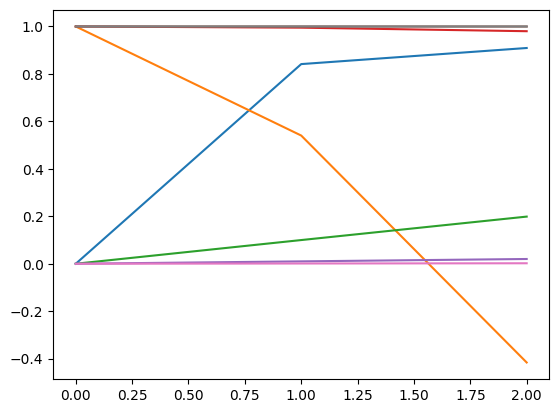

In [262]:
import matplotlib.pyplot as plt

print(sinusoidal_positional_encoding(seq_len=3, d_model=8))
plt.plot(sinusoidal_positional_encoding(seq_len=3, d_model=8))

In [265]:
emb_matrix

array([[0.8482495 , 0.04986637, 0.20562791, 0.00952236, 0.7270191 ,
        0.30272993, 0.31550052, 0.75498885],
       [0.01020411, 0.46739105, 0.62422444, 0.03273259, 0.61797146,
        0.09025172, 0.37094097, 0.85199983],
       [0.97150613, 0.79062842, 0.32382685, 0.43282455, 0.9664548 ,
        0.91237783, 0.94665745, 0.40381436]])

In [266]:
pos_emb = sinusoidal_positional_encoding(3, 8)

In [269]:
emb_matrix + pos_emb

array([[0.8482495 , 1.04986637, 0.20562791, 1.00952236, 0.7270191 ,
        1.30272993, 0.31550052, 1.75498885],
       [0.85167509, 1.00769336, 0.72405785, 1.02773675, 0.62797129,
        1.09020172, 0.37194097, 1.85199933],
       [1.88080356, 0.37448159, 0.52249618, 1.41289113, 0.98645346,
        1.91217784, 0.94865745, 1.40381236]])

In [276]:
n_head_attention(embeddings=emb_matrix + pos_emb, d_k=4, h=2)

array([[ 0.45607576,  0.45536348,  0.5579262 ,  0.38398803,  0.50055021,
         0.29944164,  0.47668296,  0.14353446],
       [ 0.41273181,  0.41330975,  0.50595181,  0.3488846 ,  0.45378019,
         0.27152128,  0.43204677,  0.13011043],
       [24.55495672, 27.79308961, 30.05972362, 17.74366122, 22.26737482,
        16.77786588, 27.71841422,  8.38584514]])